In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons                 # 데이터 셋
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score              # 정확도
from matplotlib.colors import ListedColormap            # 결정경계 시각화

In [3]:
# 데이터 셋 생성 분할
X, y = make_moons(n_samples=1000, noise=0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
print('훈련 데이터 크기: ', X_train.shape)

훈련 데이터 크기:  (700, 2)


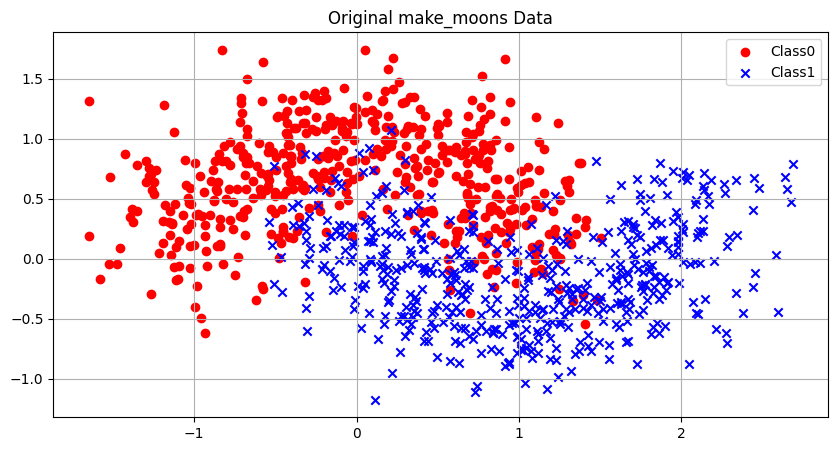

In [9]:
# 데이터 셋 시각화 (어떻게 생겼는지 눈으로 확인하자)

plt.figure(figsize=(10, 5))
plt.scatter(X[:,0][y==0], X[:,1][y==0], c='red', marker='o', label ='Class0')
plt.scatter(X[:,0][y==1], X[:,1][y==1], c='blue', marker='x', label ='Class1')
plt.title("Original make_moons Data")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# 단일 디시전 트리 (max_depth=5) 모델링

dt_clf = DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [11]:
# 테스트 데이터 예측

y_pred_dt = dt_clf.predict(X_test)

In [12]:
# 정확도(Accuracy) 계산

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("단일 결정 트리 정확도: {:.4f}".format(accuracy_dt))

Decision Tree Accuracy: 0.8733


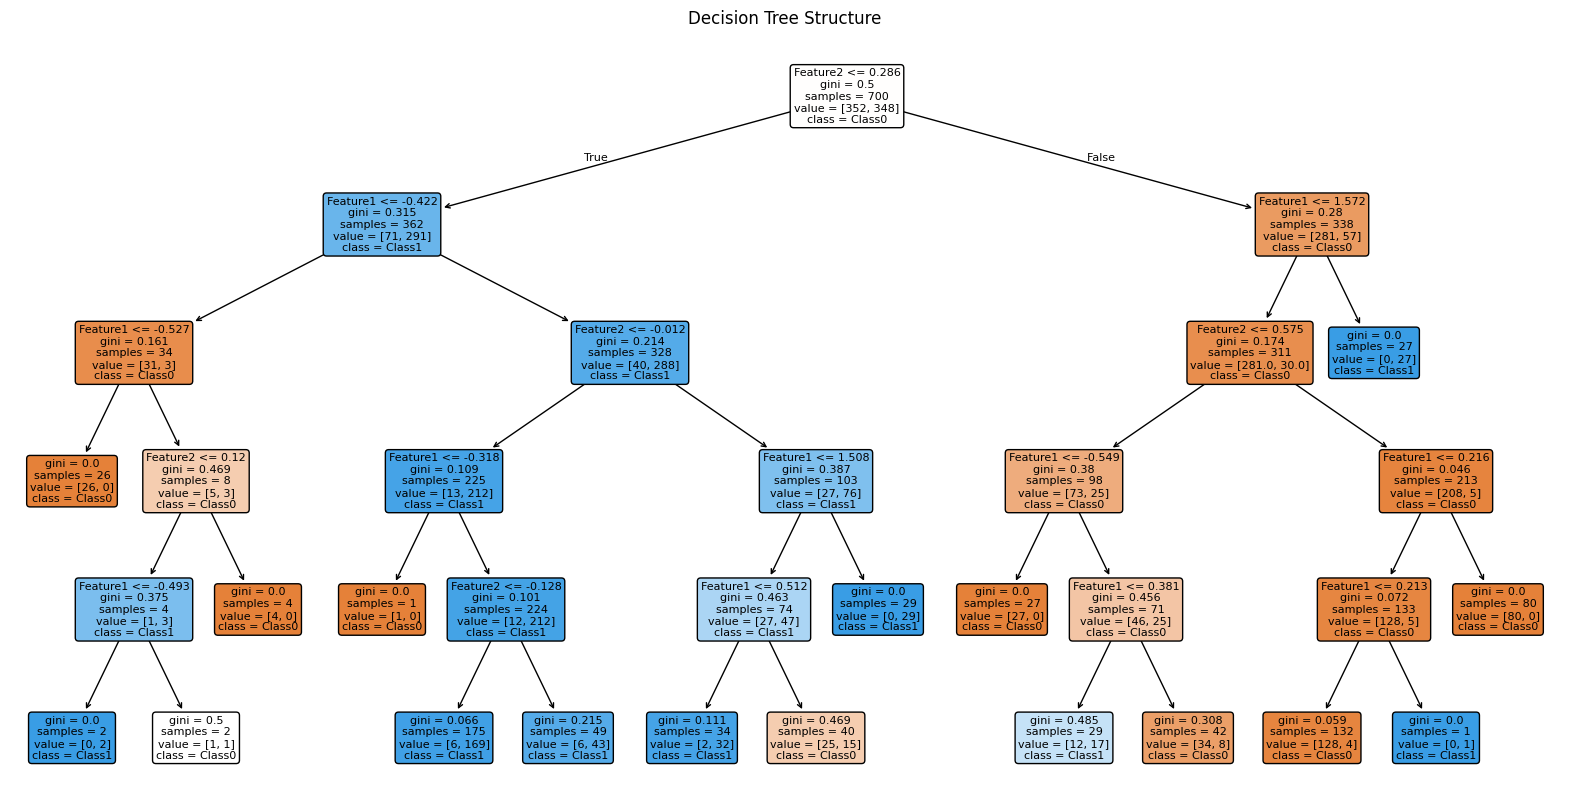

In [13]:
# 단일 결정 트리 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10)) # 트리구조 커서 사이즈 크게

plot_tree(
    dt_clf,         # 모델
    filled=True,
    feature_names=['Feature1', 'Feature2'], # 특성에 대한 이름 지정
    class_names=['Class0', 'Class1'],       # 클래스에 대한 이름 지정
    rounded=True,
    fontsize=8
    #proportion=True
)

plt.title('Decision Tree Structure')
plt.show()

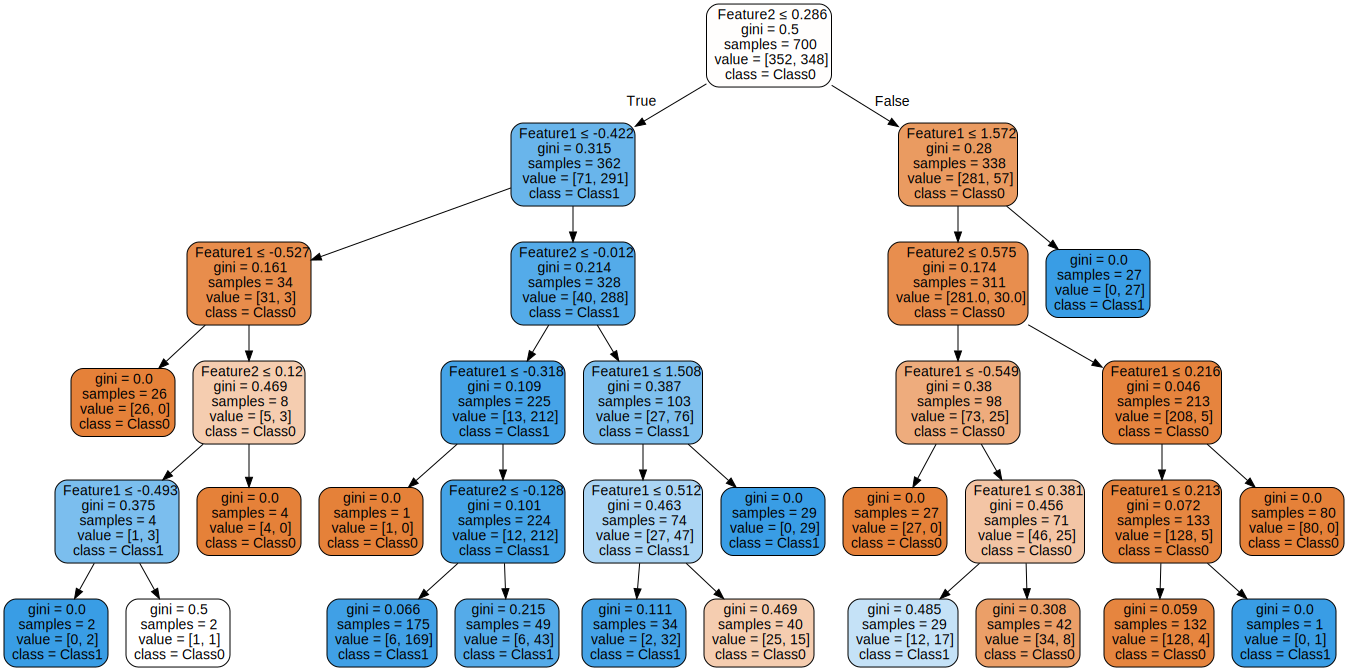

In [17]:
# 추가 - 트리 구조가 좀더 보기 좋은 시각화 - graphviz

from sklearn.tree import export_graphviz
import graphviz

# export_graphviz .dot 포맷으로 트리 구조 저장
dot_data = export_graphviz(
    dt_clf,
    out_file = None,
    feature_names = ['Feature1', 'Feature2'],    # 특성에 대한 이름 지정
    class_names = ['Class0', 'Class1'],          # 클래스에 대한 이름 지정
    filled=True,
    rounded=True,
    special_characters=True
)

# Graphviz로 렌더링
graph = graphviz.Source(dot_data)

graph

In [18]:
# 단일 디시전 트리 결과 시각화

def plot_decision_boundary(model, X, y, title="Decision Boundary"): # 모델, 독립, 종속변수
    # 컬러맵 정의
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])  # 배경 색
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])   # 점 색

    # 그리드 영역 설정
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # 모델로 예측한 결정 경계
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 시각화
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)  # 결정 경계 색
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=30)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

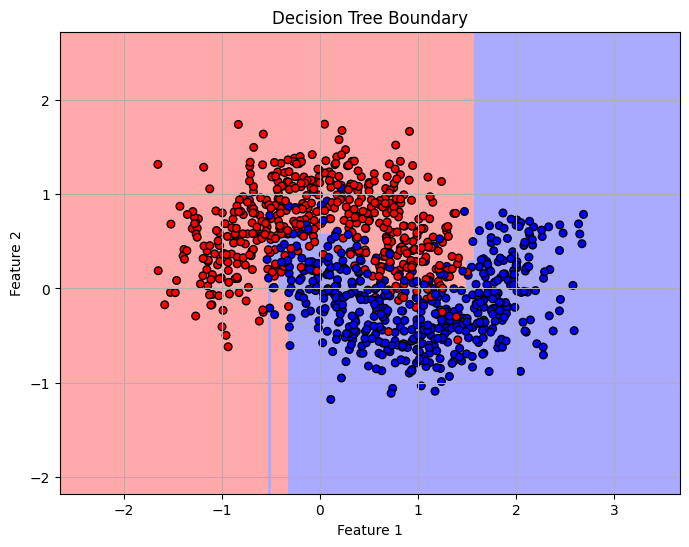

In [19]:
# 단일 결정 트리 시각화
plot_decision_boundary(dt_clf, X, y, title="Decision Tree Boundary")

In [23]:
# 랜덤 포레스트 모델 학습

rf_clf = RandomForestClassifier(max_depth=5, n_estimators=100, n_jobs=-1) # n_jobs=-1는 모든 코어 사용하겠다는 뜻 / n_estimators=100 -> 나무의 개수
rf_clf.fit(X_train, y_train)

# 모델 예상 - 테스트 데이터 예측
y_pred_rf = rf_clf.predict(X_test)

# 정확도 계산
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("랜덤 포레스트 정확도: {:.4f}".format(accuracy_rf))

랜덤 포레스트 정확도: 0.8900


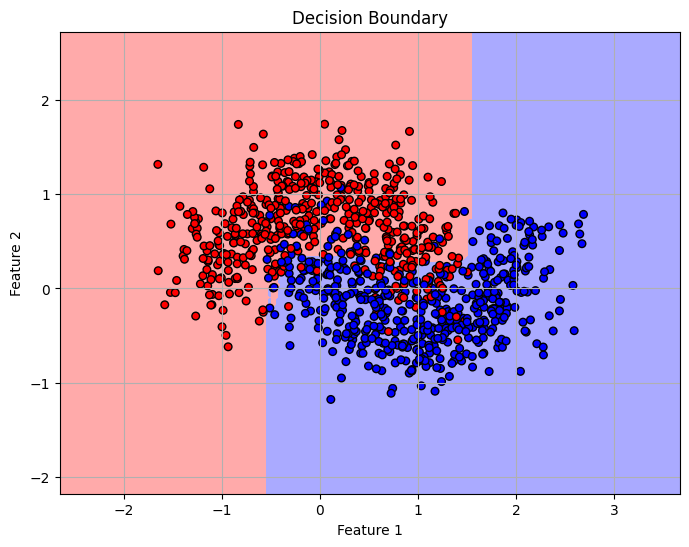

In [22]:
# 랜덤 포레스트 결과 시각화
plot_decision_boundary(rf_clf, X, y)